<a href="https://colab.research.google.com/github/ChrisMath26/Computacion/blob/main/M%C3%A1quinas%20de%20Turing/Teor%C3%ADa_de_la_computaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Máquinas de turing

#Definimos la clase MaquinaDeTuring:

In [ ]:
class MaquinaDeTuring:
    def __init__(self, cinta, simbolo_blanco="#", estado_inicial="q0"):
        self.cinta = list(cinta)  # Representación de la cinta
        self.simbolo_blanco = simbolo_blanco
        self.posicion_cabeza = 0
        self.estado =  estado_inicial
        self.transiciones = {}
        self.combinaciones_finales = set()  # Conjunto que almacena las combinaciones finales (estado, símbolo) en las que la máquina debe detenerse

    def agregar_transicion(self, estado, simbolo, nuevo_simbolo, direccion, nuevo_estado):
        self.transiciones[(estado, simbolo)] = (nuevo_simbolo, direccion, nuevo_estado) #I(q_i,s) = (t,M,q_j) M=R o M=L

    def agregar_combinacion_final(self, estado, simbolo):
        # Marca una combinación (estado, símbolo) como final
        self.combinaciones_finales.add((estado, simbolo))

    def paso(self):
        # Ejecuta un paso de la máquina de Turing
        simbolo = self.cinta[self.posicion_cabeza]  # Lee el símbolo bajo la cabeza

        # Si la combinación actual es una combinación final, la máquina se detiene
        if (self.estado, simbolo) in self.combinaciones_finales:
            print(f"La máquina se detiene en la combinación final: ({self.estado}, {simbolo})")
            return False

        # Verifica si existe una transición para la combinación actual
        #va ejecutando los movimientos en la cinta con base a las instrucciones i.e en el rango de la funcion parcial
        if (self.estado, simbolo) in self.transiciones:
            nuevo_simbolo, direccion, nuevo_estado = self.transiciones[(self.estado, simbolo)]
            self.cinta[self.posicion_cabeza] = nuevo_simbolo  # Escribe el nuevo símbolo
            self.estado = nuevo_estado  # Cambia al nuevo estado

            # Mueve la cabeza
            if direccion == "R":
                self.posicion_cabeza += 1
            elif direccion == "L":
                self.posicion_cabeza -= 1

            # Expande la cinta si es necesario (ir generando los blancos "infinitos" espacios en blanco de la cinta)
            if self.posicion_cabeza < 0:
                self.cinta.insert(0, self.simbolo_blanco)
                self.posicion_cabeza = 0
            elif self.posicion_cabeza >= len(self.cinta):
                self.cinta.append(self.simbolo_blanco)

            return True
        else:
            print(f"No se encuentra transición para la combinación: ({self.estado}, {simbolo})")
            return False

    def ejecutar(self):
        while self.paso():
            print(f"Estado: {self.estado}, Cinta: {''.join(self.cinta)}, Posición cabeza: {self.posicion_cabeza}")


#a) Trasladar una cadena en la cinta
 La siguiente máquina es tal que si se inicializa en una celda arbitraria en el estado $q_0$ a la izquierda del comienzo de una cadena $w = s_1 s_2 \cdots s_k$, $w \in \{0, 1\}^*$:
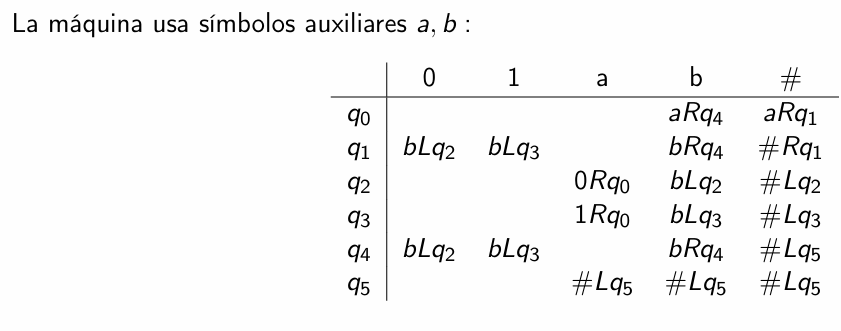


- $\Sigma = \{1, 0, a, b\}$
- $K = \{q_0, q_1, q_2, q_3, q_4, q_5\}$
- I : $\{q_0, q_1, q_2, q_3, q_4, q_5\} \times \{1, 0, a, b, \#\} \to \{1, 0, a, b, \#\} \times \{R, L\} \times \{q_0, q_1, q_2, q_3, q_4, q_5\}$
- En particular $w$ = ######100101

In [ ]:
# Definición de la máquina de Turing que traslada una cadena en la cinta
def configurar_maquina_de_turing():
    cinta = "######100101"  # Cadena inicial en la cinta (ejemplo)
    mt = MaquinaDeTuring(cinta)

    # Agregar transiciones según la tabla (conjunto de instrucciones) donde, I(q_i,s) = (t,M,q_j) y (q_i,s,t,M, q_j) pertenece a I
    mt.agregar_transicion("q0", "b", "a", "R", "q4")
    mt.agregar_transicion("q0", "#", "a", "R", "q1")

    mt.agregar_transicion("q1", "0", "b", "L", "q2")
    mt.agregar_transicion("q1", "1", "b", "L", "q3")
    mt.agregar_transicion("q1", "b", "b", "R", "q4")
    mt.agregar_transicion("q1", "#", "#", "R", "q1")

    mt.agregar_transicion("q2", "a", "0", "R", "q0")
    mt.agregar_transicion("q2", "b", "b", "L", "q2")
    mt.agregar_transicion("q2", "#", "#", "L", "q2")

    mt.agregar_transicion("q3", "a", "1", "R", "q0")
    mt.agregar_transicion("q3", "b", "b", "L", "q3")
    mt.agregar_transicion("q3", "#", "#", "L", "q3")

    mt.agregar_transicion("q4", "0", "b", "L", "q2")
    mt.agregar_transicion("q4", "1", "b", "L", "q3")
    mt.agregar_transicion("q4", "b", "b", "R", "q4")
    mt.agregar_transicion("q4", "#", "#", "L", "q5")

    mt.agregar_transicion("q5", "a", "#", "L", "q5")
    mt.agregar_transicion("q5", "b", "#", "L", "q5")
    mt.agregar_transicion("q5", "#", "#", "L", "q5")

    # Combinaciones finales donde la máquina se detiene
    mt.agregar_combinacion_final("q0", "0")
    mt.agregar_combinacion_final("q0", "1")
    mt.agregar_combinacion_final("q0", "a")
    mt.agregar_combinacion_final("q1", "a")
    mt.agregar_combinacion_final("q2", "0")
    mt.agregar_combinacion_final("q2", "1")
    mt.agregar_combinacion_final("q3", "0")
    mt.agregar_combinacion_final("q3", "1")
    mt.agregar_combinacion_final("q4", "a")
    mt.agregar_combinacion_final("q5", "0")
    mt.agregar_combinacion_final("q5", "1")

    return mt

# Ejecución de la máquina de Turing
mt = configurar_maquina_de_turing()
mt.ejecutar()
print("Estado final de la cinta:", "".join(mt.cinta))

Estado: q1, Cinta: a#####100101, Posición cabeza: 1
Estado: q1, Cinta: a#####100101, Posición cabeza: 2
Estado: q1, Cinta: a#####100101, Posición cabeza: 3
Estado: q1, Cinta: a#####100101, Posición cabeza: 4
Estado: q1, Cinta: a#####100101, Posición cabeza: 5
Estado: q1, Cinta: a#####100101, Posición cabeza: 6
Estado: q3, Cinta: a#####b00101, Posición cabeza: 5
Estado: q3, Cinta: a#####b00101, Posición cabeza: 4
Estado: q3, Cinta: a#####b00101, Posición cabeza: 3
Estado: q3, Cinta: a#####b00101, Posición cabeza: 2
Estado: q3, Cinta: a#####b00101, Posición cabeza: 1
Estado: q3, Cinta: a#####b00101, Posición cabeza: 0
Estado: q0, Cinta: 1#####b00101, Posición cabeza: 1
Estado: q1, Cinta: 1a####b00101, Posición cabeza: 2
Estado: q1, Cinta: 1a####b00101, Posición cabeza: 3
Estado: q1, Cinta: 1a####b00101, Posición cabeza: 4
Estado: q1, Cinta: 1a####b00101, Posición cabeza: 5
Estado: q1, Cinta: 1a####b00101, Posición cabeza: 6
Estado: q4, Cinta: 1a####b00101, Posición cabeza: 7
Estado: q2, 

In [ ]:
print(mt.cinta)
print( "".join(mt.cinta))

['1', '0', '0', '1', '0', '1', '#', '#', '#', '#', '#', '#', '#']
100101#######


#b) Multiplicación en monádico
Construir una máquina que multiplica en notación de palotes.
- $\Sigma = \{/, b\}$
- $K = \{q_0, q_1, q_2, q_3, q_4, q_5, q_6, q_7, q_8\}$
- I : $\{q_0, q_1, q_2, \dots, q_8\} \times \{/, b, \#\} \to \{/, b, \#\} \times \{R, L\} \times \{ q_0, q_1, q_2, \dots, q_8\}$
- En particular $w$ = //#///

In [ ]:
# Definición de la máquina de Turing Multiplicación en monádico
def configurar_maquina_de_turing():
    cinta = "//#///"  # Cadena inicial en la cinta (ejemplo)
    mt = MaquinaDeTuring(cinta)

    # Agregar transiciones según la tabla (conjunto de instrucciones)
    mt.agregar_transicion("q0", "/", "#", "R", "q1")
    mt.agregar_transicion("q0", "#", "#", "R", "q8")

    mt.agregar_transicion("q1", "/", "/", "R", "q1")
    mt.agregar_transicion("q1", "#", "#", "R", "q2")

    mt.agregar_transicion("q2", "/", "b", "R", "q3")
    mt.agregar_transicion("q2", "#", "#", "L", "q6")

    mt.agregar_transicion("q3", "/", "/", "R", "q3")
    mt.agregar_transicion("q3", "#", "#", "R", "q4")

    mt.agregar_transicion("q4", "/", "/", "R", "q4")
    mt.agregar_transicion("q4", "#", "/", "L", "q5")


    #mt.agregar_transicion("q5", "/", "/", "R", "q4")
    mt.agregar_transicion("q5", "/", "/", "L", "q5")
    mt.agregar_transicion("q5", "b", "/", "R", "q2")
    mt.agregar_transicion("q5", "#", "#", "L", "q5")

    mt.agregar_transicion("q6", "/", "/", "L", "q6")
    mt.agregar_transicion("q6", "#", "#", "L", "q7")

    mt.agregar_transicion("q7", "/", "/", "L", "q7")
    mt.agregar_transicion("q7", "#", "#", "R", "q0")

    mt.agregar_transicion("q8", "/", "#", "R", "q8")



    # Combinaciones finales donde la máquina se detiene

    mt.agregar_combinacion_final("q0", "b")
    mt.agregar_combinacion_final("q1", "b")
    mt.agregar_combinacion_final("q2", "b")
    mt.agregar_combinacion_final("q3", "b")
    mt.agregar_combinacion_final("q4", "b")
    mt.agregar_combinacion_final("q6", "b")
    mt.agregar_combinacion_final("q7", "b")
    mt.agregar_combinacion_final("q8", "b")
    mt.agregar_combinacion_final("q8", "#")

    return mt

# Ejecución de la máquina de Turing
mt = configurar_maquina_de_turing()
mt.ejecutar()
print("Estado final de la cinta:", "".join(mt.cinta))

Estado: q1, Cinta: #/#///, Posición cabeza: 1
Estado: q1, Cinta: #/#///, Posición cabeza: 2
Estado: q2, Cinta: #/#///, Posición cabeza: 3
Estado: q3, Cinta: #/#b//, Posición cabeza: 4
Estado: q3, Cinta: #/#b//, Posición cabeza: 5
Estado: q3, Cinta: #/#b//#, Posición cabeza: 6
Estado: q4, Cinta: #/#b//##, Posición cabeza: 7
Estado: q5, Cinta: #/#b//#/, Posición cabeza: 6
Estado: q5, Cinta: #/#b//#/, Posición cabeza: 5
Estado: q5, Cinta: #/#b//#/, Posición cabeza: 4
Estado: q5, Cinta: #/#b//#/, Posición cabeza: 3
Estado: q2, Cinta: #/#///#/, Posición cabeza: 4
Estado: q3, Cinta: #/#/b/#/, Posición cabeza: 5
Estado: q3, Cinta: #/#/b/#/, Posición cabeza: 6
Estado: q4, Cinta: #/#/b/#/, Posición cabeza: 7
Estado: q4, Cinta: #/#/b/#/#, Posición cabeza: 8
Estado: q5, Cinta: #/#/b/#//, Posición cabeza: 7
Estado: q5, Cinta: #/#/b/#//, Posición cabeza: 6
Estado: q5, Cinta: #/#/b/#//, Posición cabeza: 5
Estado: q5, Cinta: #/#/b/#//, Posición cabeza: 4
Estado: q2, Cinta: #/#///#//, Posición cabeza:

#c) Sumar 1 en notación decimal
La máquina se inicializa en $q_0$ leyendo el primer dígito a la izquierda
 correspondiente a un número n en notación decimal.
 Se detiene produciendo la notación decimal de n + 1 leyendo la celda
 anterior a su primer dígito.
- $\Sigma = \{0, 1, 2, 3, 4, 5, 6, 7, 8, 9\}$
- $K = \{q_0, q_1, q_2\}$
- I : $\{q_0, q_1, q_2\} \times \{ 0, 1, 2, \dots, 9, \#\} \to \{0, 1, 2, \dots, 9, \#\} \times \{R, L\} \times \{ q_0, q_1, q_2\}$
- En particular $w$ = 39499

In [ ]:
# Definición de la máquina de Turing Multiplicación en monádico
def configurar_maquina_de_turing_notDecimal():
    #cinta = "39499"  # Cadena inicial en la cinta (ejemplo)
    #mt = MaquinaDeTuring(cinta)
    mt = MaquinaDeTuring(cinta="39499", estado_inicial="q0")
    # Agregar transiciones según la tabla (conjunto de instrucciones)
    mt.agregar_transicion("q0", "0", "0", "R", "q0")
    mt.agregar_transicion("q0", "1", "1", "R", "q0")
    mt.agregar_transicion("q0", "2", "2", "R", "q0")
    mt.agregar_transicion("q0", "3", "3", "R", "q0")
    mt.agregar_transicion("q0", "4", "4", "R", "q0")
    mt.agregar_transicion("q0", "5", "5", "R", "q0")
    mt.agregar_transicion("q0", "6", "6", "R", "q0")
    mt.agregar_transicion("q0", "7", "7", "R", "q0")
    mt.agregar_transicion("q0", "8", "8", "R", "q0")
    mt.agregar_transicion("q0", "9", "9", "R", "q0")
    mt.agregar_transicion("q0", "#", "#", "L", "q1")


    mt.agregar_transicion("q1", "0", "1", "L", "q2")
    mt.agregar_transicion("q1", "1", "2", "L", "q2")
    mt.agregar_transicion("q1", "2", "3", "L", "q2")
    mt.agregar_transicion("q1", "3", "4", "L", "q2")
    mt.agregar_transicion("q1", "4", "5", "L", "q2")
    mt.agregar_transicion("q1", "5", "6", "L", "q2")
    mt.agregar_transicion("q1", "6", "7", "L", "q2")
    mt.agregar_transicion("q1", "7", "8", "L", "q2")
    mt.agregar_transicion("q1", "8", "9", "L", "q2")
    mt.agregar_transicion("q1", "9", "0", "L", "q1")
    mt.agregar_transicion("q1", "#", "1", "L", "q2")


    mt.agregar_transicion("q2", "0", "0", "L", "q2")
    mt.agregar_transicion("q2", "1", "2", "L", "q2")
    mt.agregar_transicion("q2", "2", "2", "L", "q2")
    mt.agregar_transicion("q2", "3", "3", "L", "q2")
    mt.agregar_transicion("q2", "4", "4", "L", "q2")
    mt.agregar_transicion("q2", "5", "5", "L", "q2")
    mt.agregar_transicion("q2", "6", "6", "L", "q2")
    mt.agregar_transicion("q2", "7", "7", "L", "q2")
    mt.agregar_transicion("q2", "8", "8", "L", "q2")
    mt.agregar_transicion("q2", "9", "9", "L", "q2")

    # Combinaciones finales donde la máquina se detiene

    mt.agregar_combinacion_final("q2", "#")

    return mt

# Ejecución de la máquina de Turing
mt = configurar_maquina_de_turing_notDecimal()
mt.ejecutar()
print("Estado final de la cinta:", "".join(mt.cinta))

Estado: q0, Cinta: 39499, Posición cabeza: 1
Estado: q0, Cinta: 39499, Posición cabeza: 2
Estado: q0, Cinta: 39499, Posición cabeza: 3
Estado: q0, Cinta: 39499, Posición cabeza: 4
Estado: q0, Cinta: 39499#, Posición cabeza: 5
Estado: q1, Cinta: 39499#, Posición cabeza: 4
Estado: q1, Cinta: 39490#, Posición cabeza: 3
Estado: q1, Cinta: 39400#, Posición cabeza: 2
Estado: q2, Cinta: 39500#, Posición cabeza: 1
Estado: q2, Cinta: 39500#, Posición cabeza: 0
Estado: q2, Cinta: #39500#, Posición cabeza: 0
La máquina se detiene en la combinación final: (q2, #)
Estado final de la cinta: #39500#


#D)  Cambiar de notación monádica a notación decimal
Sean,\
$\overline{n}$ = $\underbrace{// \, / \, / \, \cdots /}_{(n+1) \text{ veces}}$

$\overline{n}_{10}$ = $n \text{ en notación decimal}$


La siguiente máquina hace la transformación $\overline{n} \to \overline{n}_{10}$, si se inicializa en $q_0$ al extremo izquierdo de $\overline{n}$. Esto se puede obtener sumando $n$ veces 1 a 0 en notación decimal.

El dato inicial $\overline{n}$ se usa como contador. Se marca el primer palote de $\overline{n}$ y los demás se eliminan sucesivamente; por cada palote eliminado se suma 1 en decimal a una expresión que aparece a la derecha y es inicialmente 0. Para realizar la suma se usa como \textbf{subrutina} la máquina del ejemplo anterior de sumar 1 en notación decimal.

El alfabeto y el conjunto de estados son respectivamente,

- $\Sigma = \{ /, 0, 1, 2, \dots, 9 \}$
- $K = \{ q'_0, \dots, q'_5, q_0, q_1, q_2 \}$
- En particular $w$ = ///
- I : $\{q'_0, \dots, q'_5, q_0, q_1, q_2 \} \times \{/, 0, 1, 2, \dots, 9, \#\} \to \{/, 0, 1, 2, \dots, 9, \#\} \times \{R, L\} \times \{ q'_0, \dots, q'_5, q_0, q_1, q_2 \}$.
\
El estado inicial $q'_0$ también es final.

In [ ]:
# Definición de la máquina de Turing Multiplicación en monádico
def configurar_maquina_de_turing_notMona_a_notDec():
    #cinta = "///////"  # Cadena inicial en la cinta (ejemplo)
    #mt = MaquinaDeTuring(cinta)
    mt = MaquinaDeTuring(cinta="///", estado_inicial="q0'")

    # Agregar transiciones según la tabla (conjunto de instrucciones)
    mt.agregar_transicion("q0'", "/", "0", "R", "q1'")

    mt.agregar_transicion("q1'", "/", "/", "R", "q1'")
    mt.agregar_transicion("q1'", "#", "#", "R", "q2'")

    mt.agregar_transicion("q2'", "#", "0", "L", "q3'")

    mt.agregar_transicion("q3'", "/", "#", "R", "q4'")
    mt.agregar_transicion("q3'", "0", "#", "R", "q0'")
    mt.agregar_transicion("q3'", "#", "#", "L", "q3'")


    mt.agregar_transicion("q4'", "/", "/", "L", "q5'")
    mt.agregar_transicion("q4'", "0", "0", "L", "q5'")
    mt.agregar_transicion("q4'", "1", "1", "L", "q5'")
    mt.agregar_transicion("q4'", "2", "2", "L", "q5'")
    mt.agregar_transicion("q4'", "3", "3", "L", "q5'")
    mt.agregar_transicion("q4'", "4", "4", "L", "q5'")
    mt.agregar_transicion("q4'", "5", "5", "L", "q5'")
    mt.agregar_transicion("q4'", "6", "6", "L", "q5'")
    mt.agregar_transicion("q4'", "7", "7", "L", "q5'")
    mt.agregar_transicion("q4'", "8", "8", "L", "q5'")
    mt.agregar_transicion("q4'", "9", "9", "L", "q5'")
    mt.agregar_transicion("q4'", "#", "#", "R", "q4'")


    mt.agregar_transicion("q5'", "#", "#", "R", "q0")


# ---------------------------------------------------------------------------
    # Reutilizar la lógica de suma de 1
    mt_suma = configurar_maquina_de_turing_notDecimal()
    mt.transiciones.update(mt_suma.transiciones)  # Importar las transiciones de la máquina de truing sumar 1 en notación decimal

    # Sobreescribir la transición específica "q2", "#"
    mt.agregar_transicion("q2", "#", "#", "L", "q3'")

#----------------------------------------------------------------------------

    # Combinaciones finales donde la máquina se detien

    mt.agregar_combinacion_final("q0'", "0")
    mt.agregar_combinacion_final("q0'", "1")
    mt.agregar_combinacion_final("q0'", "2")
    mt.agregar_combinacion_final("q0'", "3")
    mt.agregar_combinacion_final("q0'", "4")
    mt.agregar_combinacion_final("q0'", "5")
    mt.agregar_combinacion_final("q0'", "6")
    mt.agregar_combinacion_final("q0'", "7")
    mt.agregar_combinacion_final("q0'", "8")
    mt.agregar_combinacion_final("q0'", "9")
    mt.agregar_combinacion_final("q0'", "#")


    mt.agregar_combinacion_final("q1'", "0")
    mt.agregar_combinacion_final("q1'", "1")
    mt.agregar_combinacion_final("q1'", "2")
    mt.agregar_combinacion_final("q1'", "3")
    mt.agregar_combinacion_final("q1'", "4")
    mt.agregar_combinacion_final("q1'", "5")
    mt.agregar_combinacion_final("q1'", "6")
    mt.agregar_combinacion_final("q1'", "7")
    mt.agregar_combinacion_final("q1'", "8")
    mt.agregar_combinacion_final("q1'", "9")


    mt.agregar_combinacion_final("q2'", "/")
    mt.agregar_combinacion_final("q2'", "0")
    mt.agregar_combinacion_final("q2'", "1")
    mt.agregar_combinacion_final("q2'", "2")
    mt.agregar_combinacion_final("q2'", "3")
    mt.agregar_combinacion_final("q2'", "4")
    mt.agregar_combinacion_final("q2'", "5")
    mt.agregar_combinacion_final("q2'", "6")
    mt.agregar_combinacion_final("q2'", "7")
    mt.agregar_combinacion_final("q2'", "8")
    mt.agregar_combinacion_final("q2'", "9")



    mt.agregar_combinacion_final("q3'", "1")
    mt.agregar_combinacion_final("q3'", "2")
    mt.agregar_combinacion_final("q3'", "3")
    mt.agregar_combinacion_final("q3'", "4")
    mt.agregar_combinacion_final("q3'", "5")
    mt.agregar_combinacion_final("q3'", "6")
    mt.agregar_combinacion_final("q3'", "7")
    mt.agregar_combinacion_final("q3'", "8")
    mt.agregar_combinacion_final("q3'", "9")


    mt.agregar_combinacion_final("q5'", "/")
    mt.agregar_combinacion_final("q5'", "0")
    mt.agregar_combinacion_final("q5'", "1")
    mt.agregar_combinacion_final("q5'", "2")
    mt.agregar_combinacion_final("q5'", "3")
    mt.agregar_combinacion_final("q5'", "4")
    mt.agregar_combinacion_final("q5'", "5")
    mt.agregar_combinacion_final("q5'", "6")
    mt.agregar_combinacion_final("q5'", "7")
    mt.agregar_combinacion_final("q5'", "8")
    mt.agregar_combinacion_final("q5'", "9")

    return mt

# Ejecución de la máquina de Turing
mt = configurar_maquina_de_turing_notMona_a_notDec()
mt.ejecutar()
print("Estado final de la cinta:", "".join(mt.cinta))

Estado: q1', Cinta: 0//, Posición cabeza: 1
Estado: q1', Cinta: 0//, Posición cabeza: 2
Estado: q1', Cinta: 0//#, Posición cabeza: 3
Estado: q2', Cinta: 0//##, Posición cabeza: 4
Estado: q3', Cinta: 0//#0, Posición cabeza: 3
Estado: q3', Cinta: 0//#0, Posición cabeza: 2
Estado: q4', Cinta: 0/##0, Posición cabeza: 3
Estado: q4', Cinta: 0/##0, Posición cabeza: 4
Estado: q5', Cinta: 0/##0, Posición cabeza: 3
Estado: q0, Cinta: 0/##0, Posición cabeza: 4
Estado: q0, Cinta: 0/##0#, Posición cabeza: 5
Estado: q1, Cinta: 0/##0#, Posición cabeza: 4
Estado: q2, Cinta: 0/##1#, Posición cabeza: 3
Estado: q3', Cinta: 0/##1#, Posición cabeza: 2
Estado: q3', Cinta: 0/##1#, Posición cabeza: 1
Estado: q4', Cinta: 0###1#, Posición cabeza: 2
Estado: q4', Cinta: 0###1#, Posición cabeza: 3
Estado: q4', Cinta: 0###1#, Posición cabeza: 4
Estado: q5', Cinta: 0###1#, Posición cabeza: 3
Estado: q0, Cinta: 0###1#, Posición cabeza: 4
Estado: q0, Cinta: 0###1#, Posición cabeza: 5
Estado: q1, Cinta: 0###1#, Posició